In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_csv(r"E:\E commerce project\Cleaned_Ecommerce_Data _working.csv")

In [3]:
df.columns

Index(['Customer_Id', 'Age', 'Gender', 'Income_Level', 'Marital_Status',
       'Education_Level', 'Occupation', 'Location', 'Purchase_Category',
       'Purchase_Amount', 'Frequency_Of_Purchase', 'Purchase_Channel',
       'Brand_Loyalty', 'Product_Rating',
       'Time_Spent_On_Product_Research(Hours)', 'Social_Media_Influence',
       'Discount_Sensitivity', 'Return_Rate', 'Customer_Satisfaction',
       'Engagement_With_Ads', 'Device_Used_For_Shopping', 'Payment_Method',
       'Time_Of_Purchase', 'Discount_Used', 'Customer_Loyalty_Program_Member',
       'Purchase_Intent', 'Shipping_Preference', 'Time_To_Decision',
       'Purchase_Day', 'Is_Weekend'],
      dtype='object')

In [4]:
df.dtypes

Customer_Id                               object
Age                                        int64
Gender                                    object
Income_Level                              object
Marital_Status                            object
Education_Level                           object
Occupation                                object
Location                                  object
Purchase_Category                         object
Purchase_Amount                          float64
Frequency_Of_Purchase                      int64
Purchase_Channel                          object
Brand_Loyalty                              int64
Product_Rating                           float64
Time_Spent_On_Product_Research(Hours)    float64
Social_Media_Influence                    object
Discount_Sensitivity                      object
Return_Rate                                int64
Customer_Satisfaction                      int64
Engagement_With_Ads                       object
Device_Used_For_Shop

In [5]:
# --- Basic Overview

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_Id                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   float64
 10  Frequency_Of_Purchase                  1000 non-null   int64  
 11  Purch

In [7]:
print(df.describe())

               Age  Purchase_Amount  Frequency_Of_Purchase  Brand_Loyalty  \
count  1000.000000      1000.000000            1000.000000    1000.000000   
mean     34.304000       275.063880               6.945000       3.026000   
std       9.353238       131.532998               3.147361       1.416803   
min      18.000000        50.710000               2.000000       1.000000   
25%      26.000000       162.235000               4.000000       2.000000   
50%      34.500000       276.165000               7.000000       3.000000   
75%      42.000000       388.982500              10.000000       4.000000   
max      50.000000       498.330000              12.000000       5.000000   

       Product_Rating  Time_Spent_On_Product_Research(Hours)  Return_Rate  \
count     1000.000000                            1000.000000  1000.000000   
mean         3.033000                               1.013030     0.954000   
std          1.436654                               0.791802     0.810272  

In [8]:
print(df.isnull().sum())

Customer_Id                              0
Age                                      0
Gender                                   0
Income_Level                             0
Marital_Status                           0
Education_Level                          0
Occupation                               0
Location                                 0
Purchase_Category                        0
Purchase_Amount                          0
Frequency_Of_Purchase                    0
Purchase_Channel                         0
Brand_Loyalty                            0
Product_Rating                           0
Time_Spent_On_Product_Research(Hours)    0
Social_Media_Influence                   0
Discount_Sensitivity                     0
Return_Rate                              0
Customer_Satisfaction                    0
Engagement_With_Ads                      0
Device_Used_For_Shopping                 0
Payment_Method                           0
Time_Of_Purchase                         0
Discount_Us

In [10]:
# --- KPI Calculations

In [11]:
# What is our total revenue?

total_revenue = df['Purchase_Amount'].sum()
print(f"Total Revenue: ₹{total_revenue:.2f}")

Total Revenue: ₹275063.88


In [22]:
# What is the average purchase value per order?


avg_purchase = df['Purchase_Amount'].mean()
print(f"Average Purchase Amount: ₹{avg_purchase:.2f}")

Average Purchase Amount: ₹275.06


In [24]:
#How many customers are repeat buyers?
# Calculates repeat customer rate  

repeat_customer_rate = df['Frequency_Of_Purchase'].gt(1).mean()
print(f"Repeat Customer Rate: {repeat_customer_rate:.2%}")

Repeat Customer Rate: 100.00%


In [26]:
#How satisfied are our customers on average?
# Calculates average satisfaction

avg_satisfaction = df['Customer_Satisfaction'].mean()
print(f"Average Customer Satisfaction: {avg_satisfaction:.2f}/10")


Average Customer Satisfaction: 5.40/10


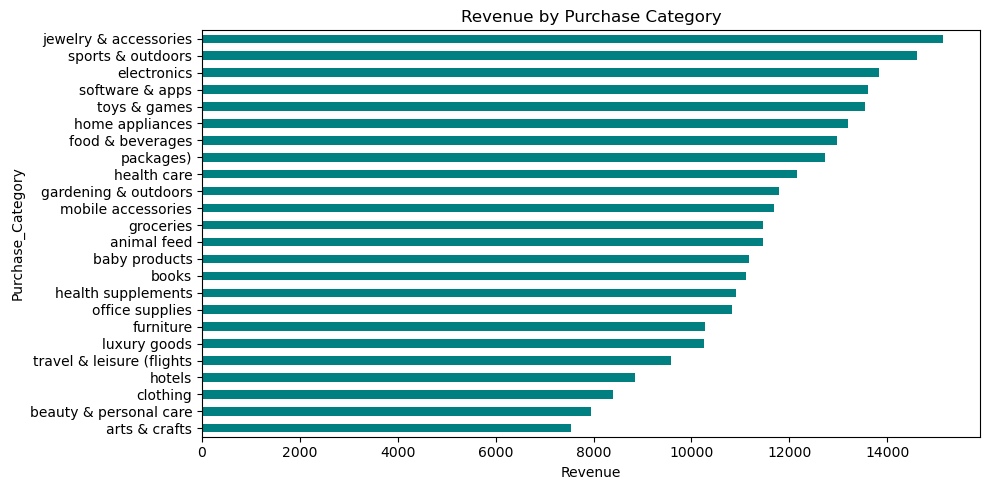

In [29]:
# Which product categories are driving the most revenue?
# --- Purchase Amount by Category

category_revenue = df.groupby('Purchase_Category')['Purchase_Amount'].sum().sort_values()

plt.figure(figsize=(10,5))

category_revenue.plot(kind='barh', color='teal')

plt.title('Revenue by Purchase Category')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()


In [30]:
# Grouped data by Purchase_Category and sums up the revenue
# therefore total revenue in each category

# Jewely and accessories have highest revenue, followed by sports and outdoors category.

In [ ]:
# Highest revenue?
# Top Locations by Revenue 
top_locations = df.groupby('Location')['Purchase_Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title('Top 10 Locations by Revenue')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()


In [35]:
# goteborg have highest revenue.

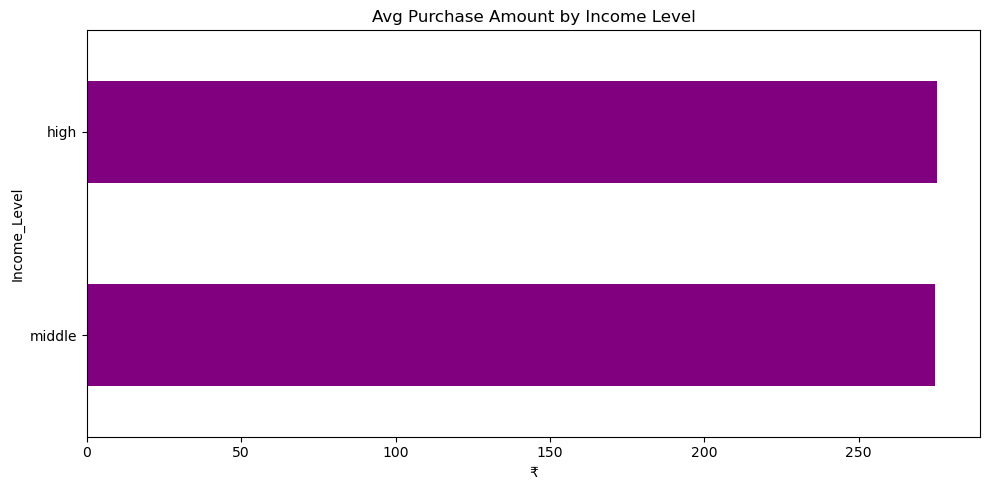

In [93]:
# Do people with different income levels spend differently?
# --- Average Purchase by Income Level 

income_purchase = df.groupby('Income_Level')['Purchase_Amount'].mean().sort_values()

plt.figure(figsize=(10,5))

income_purchase.plot(kind='barh', color='purple')

plt.title('Avg Purchase Amount by Income Level')
plt.xlabel('₹')
plt.tight_layout()
plt.show()

In [41]:
# average purchase amount across income groups

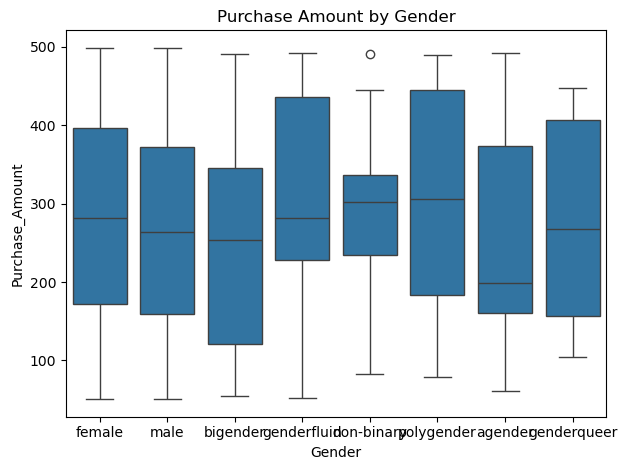

In [44]:
#  Do male and female customers show differences in how much they spend?
# --- Gender-wise Purchase Behavior 


sns.boxplot(x='Gender', y='Purchase_Amount', data=df)
plt.title('Purchase Amount by Gender')
plt.tight_layout()
plt.show()

In [45]:
# Compared distribution of purchase amounts for each gender using a boxplot

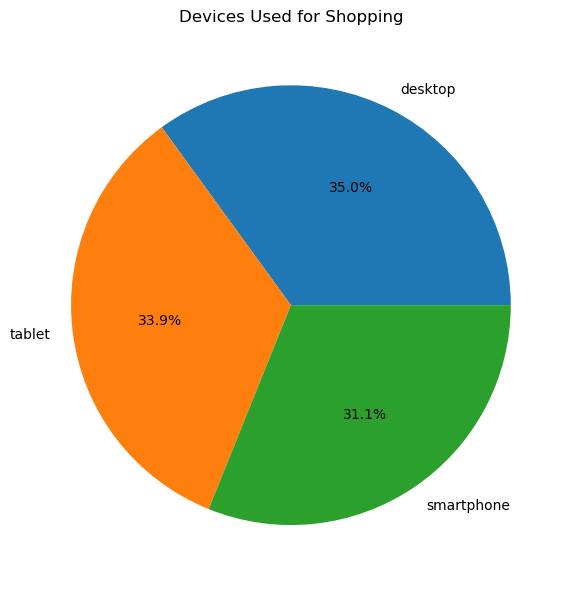

In [49]:
# What devices (mobile, desktop, tablet) do customers prefer for shopping?
# --- Device Used for Shopping 

device_counts = df['Device_Used_For_Shopping'].value_counts()

device_counts.plot(kind='pie', autopct='%1.1f%%', title='Devices Used for Shopping', figsize=(6,6))

plt.ylabel('')
plt.tight_layout()
plt.show()

In [51]:
# most shopping are done via desktop

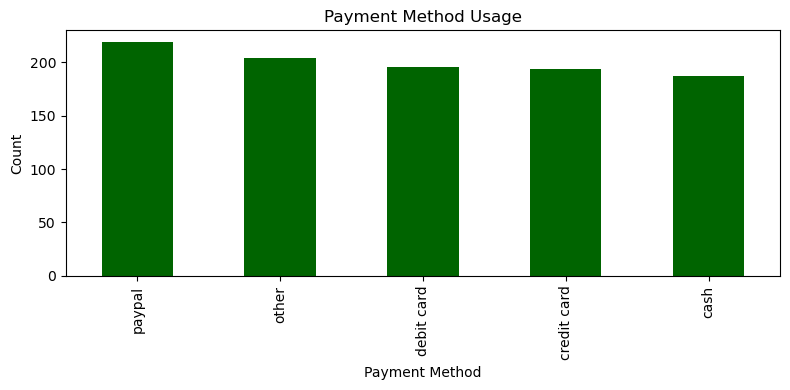

In [54]:
#  What are the most common payment methods used by customers?
# --- Payment Method Distribution 

payment_usage = df['Payment_Method'].value_counts()

payment_usage.plot(kind='bar', color='darkgreen', title='Payment Method Usage', figsize=(8,4))

plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [56]:
#paypal is used most followed by others

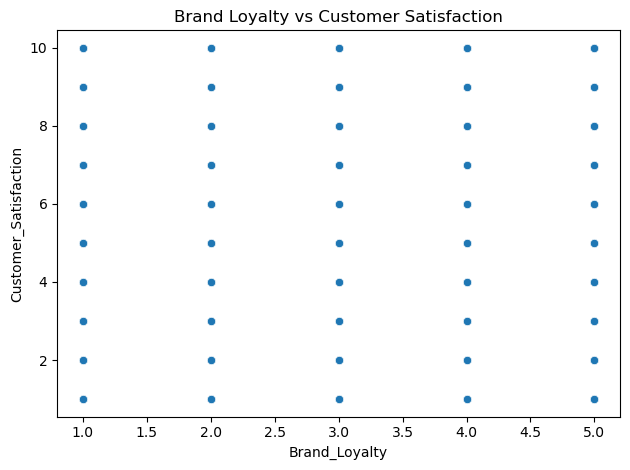

In [59]:
# Is there a relationship between how loyal customers are and how satisfied they feel?
# --- Brand Loyalty vs Customer Satisfaction 

sns.scatterplot(x='Brand_Loyalty', y='Customer_Satisfaction', data=df)
plt.title('Brand Loyalty vs Customer Satisfaction')
plt.tight_layout()
plt.show()


In [61]:
# each dot shows one customer

# when the dots go upward to the right ----> Customers who are more loyal
#                                             to the brand are also more satisfied. 

# when the dots go downward to the right ----> More loyal customers are somehow
#                                               less satisfied


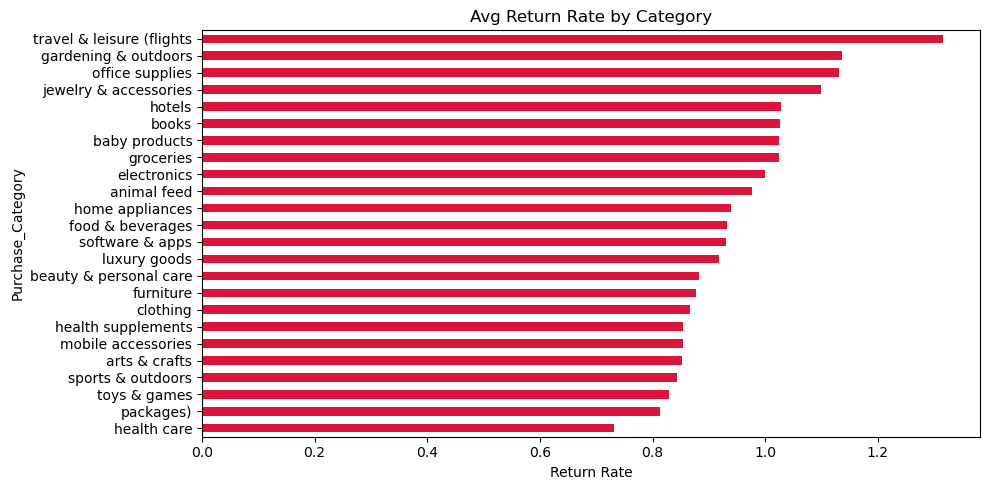

In [64]:
# Which product categories are being returned the most?
# --- Return Rate by Purchase Category

category_returns = df.groupby('Purchase_Category')['Return_Rate'].mean().sort_values()
category_returns.plot(kind='barh', color='crimson', figsize=(10,5))
plt.title('Avg Return Rate by Category')
plt.xlabel('Return Rate')
plt.tight_layout()
plt.show()


In [66]:
# travel and leisure have highest return rate

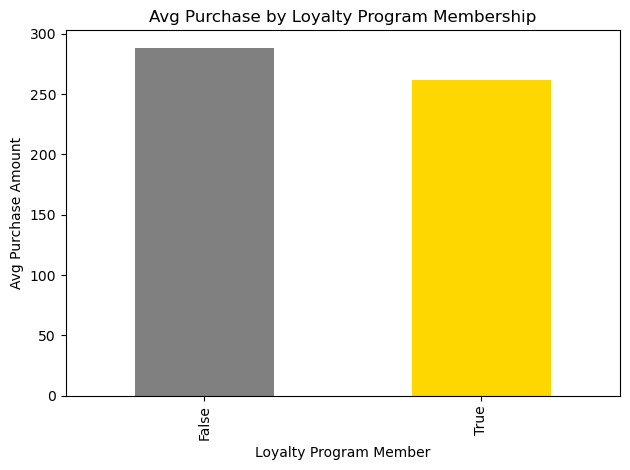

In [69]:
# Does being part of the loyalty program influence how much customers spend?
# --- Loyalty Program Impact 

loyalty_kpi = df.groupby('Customer_Loyalty_Program_Member')['Purchase_Amount'].mean()

loyalty_kpi.plot(kind='bar', title='Avg Purchase by Loyalty Program Membership', color=['gray', 'gold'])

plt.xlabel('Loyalty Program Member')
plt.ylabel('Avg Purchase Amount')
plt.tight_layout()
plt.show()


In [ ]:
# when Customer is a member of the loyalty program ---> avg purchase amount is ~250
# when Customer is a member of the loyalty program ---> avg purchase amount is ~275+

# so, customers who arent member spends more on purchase on average. 

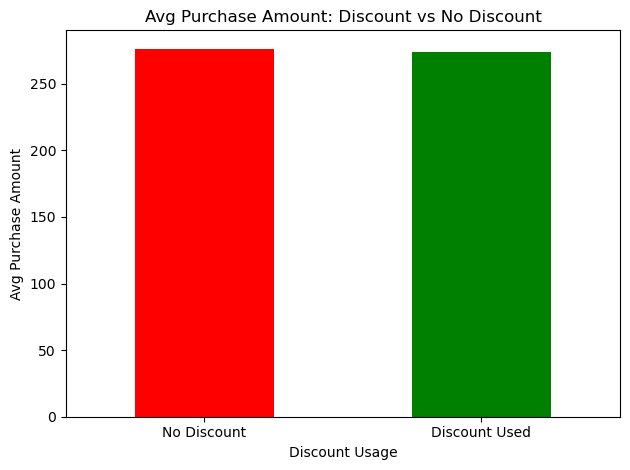

In [71]:
# Do customers who use discounts spend more or less than those who don't?
# --- Discount Effect on Spend 
discount_avg = df.groupby('Discount_Used')['Purchase_Amount'].mean()
discount_avg.plot(kind='bar', color=['red', 'green'], title='Avg Purchase Amount: Discount vs No Discount')
plt.xticks([0, 1], ['No Discount', 'Discount Used'], rotation=0)
plt.xlabel('Discount Usage')
plt.ylabel('Avg Purchase Amount')
plt.tight_layout()
plt.show()

In [ ]:
# both spend same.

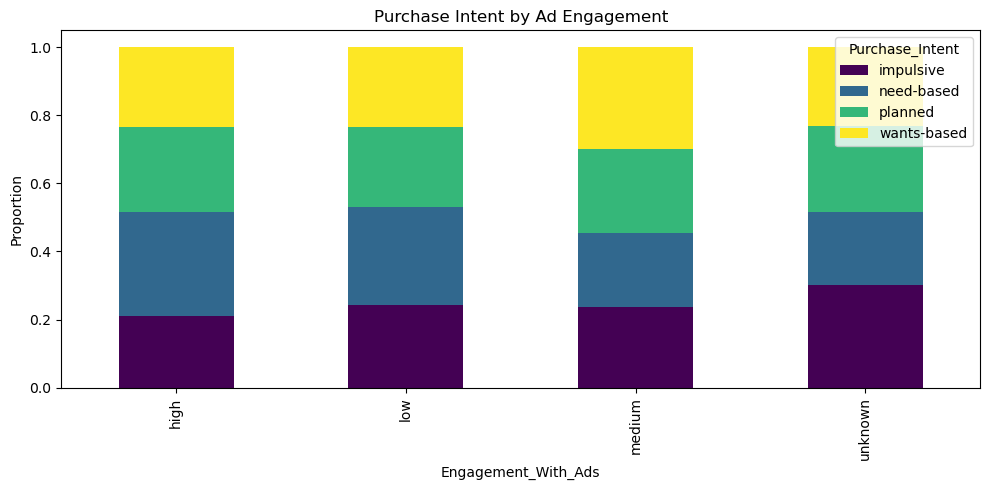

In [73]:
# Does a customer’s engagement with advertisements impact their purchase intent?
# --- Ad Engagement vs Purchase Intent 
ad_intent = pd.crosstab(df['Engagement_With_Ads'], df['Purchase_Intent'], normalize='index')
ad_intent.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,5))
plt.title('Purchase Intent by Ad Engagement')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()


In [83]:
# Ad engagement does not drastically change the type of purchase intent
# Ads may not be strongly influencing behavior.

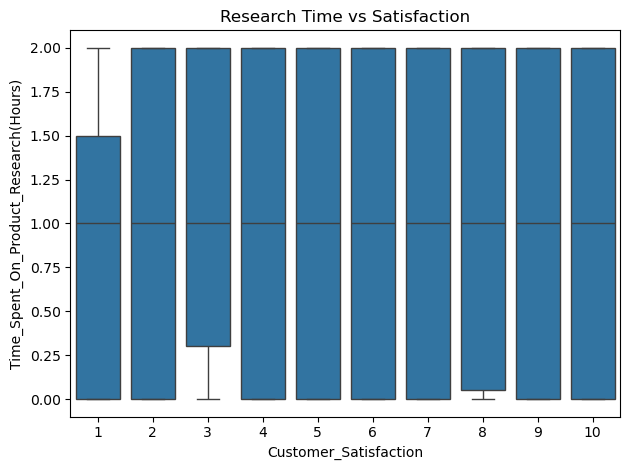

In [75]:
# Are customers who spend more time researching products more satisfied with their purchases?
# ---  Research Time vs Satisfaction 
sns.boxplot(x='Customer_Satisfaction', y='Time_Spent_On_Product_Research(Hours)', data=df)
plt.title('Research Time vs Satisfaction')
plt.tight_layout()
plt.show()


In [ ]:
# No clear trend showing that more research = more satisfaction

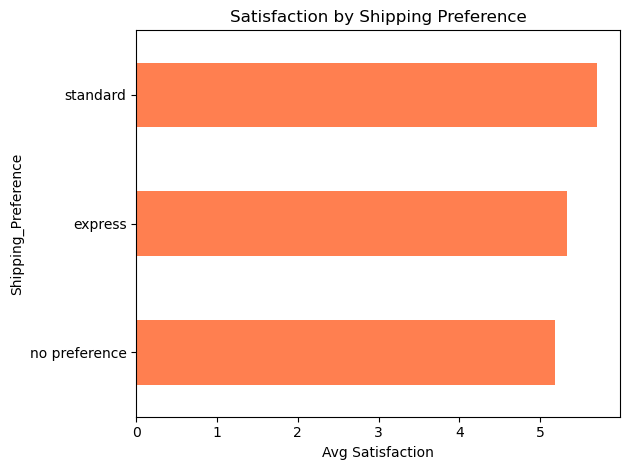

In [77]:
# How does a customer's preferred shipping method affect their overall satisfaction?
# --- Shipping Preference vs Satisfaction 
shipping_satisfaction = df.groupby('Shipping_Preference')['Customer_Satisfaction'].mean().sort_values()
shipping_satisfaction.plot(kind='barh', color='coral')
plt.title('Satisfaction by Shipping Preference')
plt.xlabel('Avg Satisfaction')
plt.tight_layout()
plt.show()


In [ ]:
# Offering and promoting reliable standard shipping could boost satisfaction

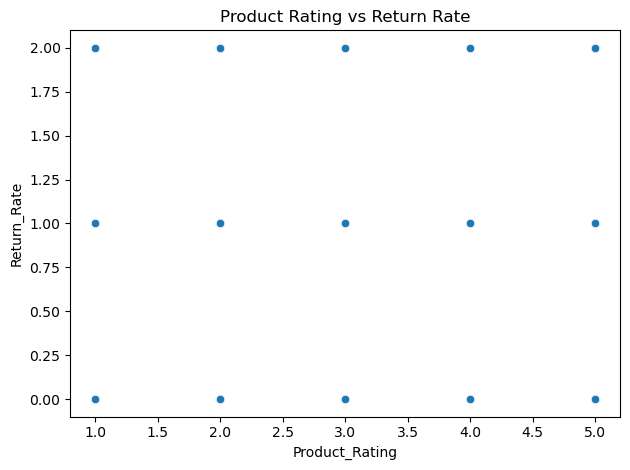

In [79]:
# Are lower-rated products being returned more frequently?
# --- Product Rating vs Return Rate 
sns.scatterplot(x='Product_Rating', y='Return_Rate', data=df)
plt.title('Product Rating vs Return Rate')
plt.tight_layout()
plt.show()


In [ ]:
# Return rate does not strongly correlate with product rating since all are almost same.

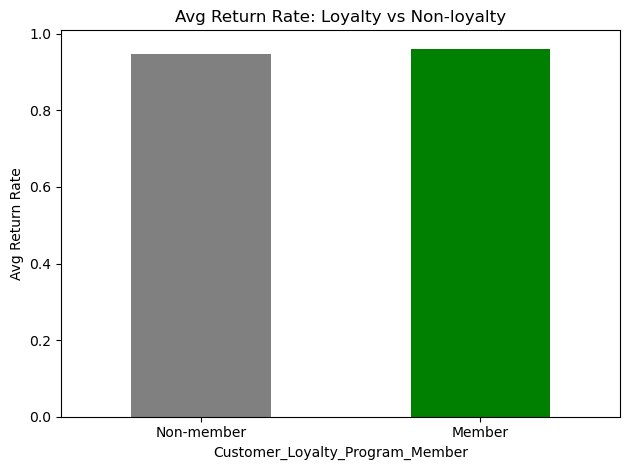

In [81]:
# Do loyalty program members return products less frequently than non-members?
# --- Loyalty Members vs Return Rate 
loyalty_return = df.groupby('Customer_Loyalty_Program_Member')['Return_Rate'].mean()
loyalty_return.plot(kind='bar', color=['grey', 'green'], title='Avg Return Rate: Loyalty vs Non-loyalty')
plt.xticks([0, 1], ['Non-member', 'Member'], rotation=0)
plt.ylabel('Avg Return Rate')
plt.tight_layout()
plt.show()

In [ ]:
# loyalty members have a slightly higher return rate than non-members.

# Key Insights:

In [91]:
# 1. strong customer demand and high-margin products in these verticals: 
# jewelry & Accessories

# Require better marketing, bundling, or promotion strategies:  Arts & Crafts, Beauty & Personal Care, and Clothing.

In [95]:
# 2. Customer Segments & Behavior
#       - Both middle and high income groups spend similarly, 
#        suggesting income is not the sole predictor of spending.

#       - Purchase patterns show overlapping distributions, 
#      with no major gap in spending between male and female customers.

#       -Members spend more on average.
#        they also show a slightly higher return rate
#       due to relaxed return privileges.


In [ ]:
# 3.  High ad engagement doesn’t significantly drive impulsive purchases
#       Most customers, regardless of ad exposure, tend toward planned or needs-based intent.
#       Customers using discounts tend to spend slightly less on average.
           


In [ ]:
# 4. No strong negative correlation found — even high-rated products are being returned.
#       No clear pattern indicating that more research leads to higher satisfaction.
#       Standard shipping yields slightly higher customer satisfaction